In [1217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Load the dataset into python environment**

In [1218]:
data=pd.read_csv('/content/titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2. Make PassengerId as the index column**

In [1219]:
titanic_data=data.set_index('PassengerId')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **3. Check the basic details of the dataset**

In [1220]:
titanic_data.shape

(891, 11)

In [1221]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [1222]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **4. Fill in all the missing values present in all the columns in the dataset**

In [1223]:
titanic_data.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


Text(0, 0.5, 'Frequency')

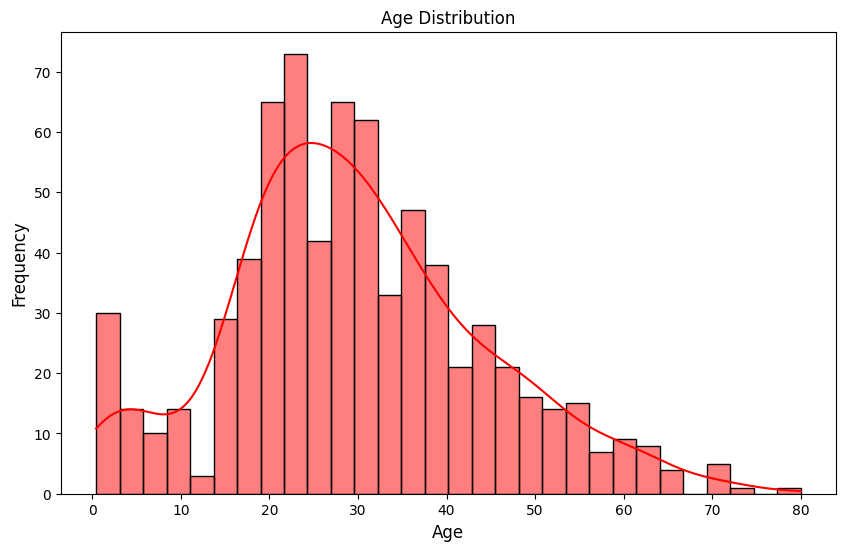

In [1224]:
# Graph of missing Value
plt.figure(figsize=(10,6))
sns.histplot(titanic_data['Age'],kde=True,bins=30,color='Red')
plt.title('Age Distribution')
plt.xlabel('Age' , fontsize=12)
plt.ylabel('Frequency',fontsize=12)

In [1225]:
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [1226]:
for i in ['Cabin','Embarked']:
  titanic_data[i]=titanic_data[i].fillna(titanic_data[i].mode()[0])

In [1227]:
titanic_data.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


<Axes: >

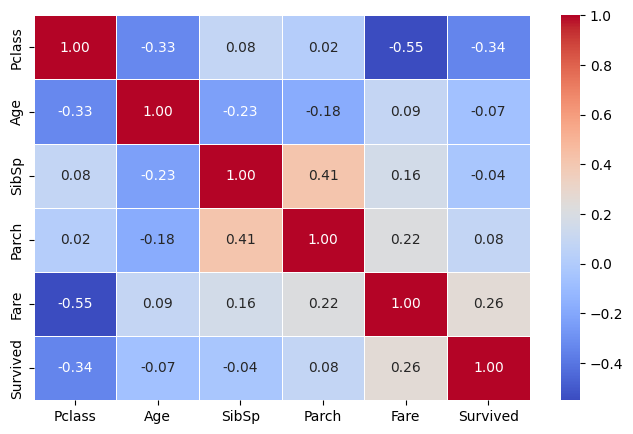

In [1228]:
#Correlation (Numerical Features)
numerical_features =['Pclass','Age','SibSp','Parch','Fare']
Correlation_matrix = titanic_data[numerical_features + ['Survived'] ].corr()
plt.figure(figsize=(8,5))
sns.heatmap(Correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)

# **5. Check and handle outliers in at least 3 columns in the dataset**

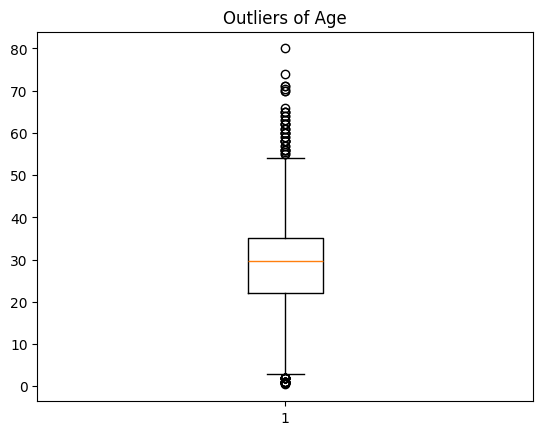

In [1229]:
plt.boxplot(titanic_data['Age'])
plt.title('Outliers of Age')
plt.show()

In [1230]:
Age_Q1=np.percentile(titanic_data['Age'],25)
Age_Q3=np.percentile(titanic_data['Age'],75)
Age_IQR = Age_Q3 - Age_Q1
Age_IQR

13.0

In [1231]:
Age_lower_limit = Age_Q1 - 1.5 * Age_IQR
Age_lower_limit

2.5

In [1232]:
Age_upper_limit = Age_Q3 + 1.5 * Age_IQR
Age_upper_limit

54.5

In [1233]:
Age_outliers=[]
for a in data['Age']:
  if (a < Age_lower_limit) or (a > Age_upper_limit):
    Age_outliers.append(a)
print(Age_outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [1234]:
remove_Age_Outliers = titanic_data['Age']>Age_upper_limit
titanic_data.loc[remove_Age_Outliers].index


Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253, 269,
       276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546, 556, 571,
       588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880],
      dtype='int64', name='PassengerId')

In [1235]:
titanic_data.drop(titanic_data.loc[remove_Age_Outliers].index,inplace=True)
titanic_data.shape

(849, 11)

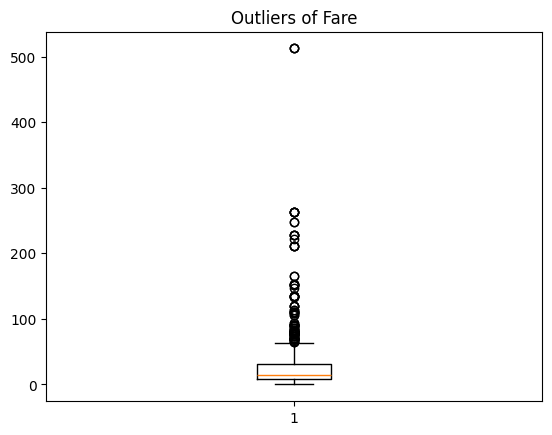

In [1236]:
plt.boxplot(titanic_data['Fare'])
plt.title('Outliers of Fare')
plt.show()

In [1237]:
Q1_Fare = np.percentile(titanic_data['Fare'], 25)
Q3_Fare = np.percentile(titanic_data['Fare'], 75)
IQR_Fare = Q3_Fare - Q1_Fare
IQR_Fare

22.6042

In [1238]:
lower_limit_Fare = Q1_Fare - 1.5 * IQR_Fare
lower_limit_Fare

-26.0105

In [1239]:
upper_limit_Fare = Q3_Fare + 1.5 * IQR_Fare
upper_limit_Fare

64.4063

In [1240]:
outliers_Fare = []
for i in titanic_data['Fare']:
  if (i < lower_limit_Fare) or (i > upper_limit_Fare):
    outliers_Fare.append(i)
print(outliers_Fare)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55]


In [1241]:
remove_outliers_Fare = titanic_data['Fare']>upper_limit_Fare
titanic_data.loc[remove_outliers_Fare].index

Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
       ...
       780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
      dtype='int64', name='PassengerId', length=108)

In [1242]:
titanic_data.drop(titanic_data.loc[remove_outliers_Fare].index,inplace=True)
titanic_data.shape

(741, 11)

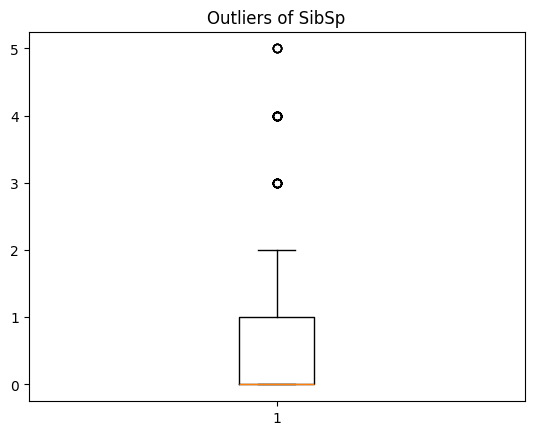

In [1243]:
plt.boxplot(titanic_data['SibSp'])
plt.title('Outliers of SibSp')
plt.show()

In [1244]:
Q1_SibSp = np.percentile(titanic_data['SibSp'], 25)
Q3_SibSp = np.percentile(titanic_data['SibSp'], 75)
IQR_SibSp = Q3_SibSp - Q1_SibSp
IQR_SibSp

1.0

In [1245]:
lower_limit_SibSp = Q1_SibSp - 1.5 * IQR_SibSp
lower_limit_SibSp

-1.5

In [1246]:
upper_limit_SibSp = Q3_SibSp + 1.5 * IQR_SibSp
upper_limit_SibSp

2.5

In [1247]:
outliers_SibSp = []
for i in titanic_data['SibSp']:
  if (i < lower_limit_SibSp) or (i > upper_limit_SibSp):
    outliers_SibSp.append(i)
print(outliers_SibSp)

[3, 4, 3, 4, 5, 3, 4, 5, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 4, 3, 4, 4]


In [1248]:
remove_outliers_SibSp = titanic_data['SibSp']>upper_limit_SibSp
titanic_data.loc[remove_outliers_SibSp].index

Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177, 183,
       230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543, 635, 643,
       684, 687, 727, 788, 814, 820, 825, 851],
      dtype='int64', name='PassengerId')

In [1249]:
titanic_data.drop(titanic_data.loc[remove_outliers_SibSp].index,inplace=True)
titanic_data.shape

(705, 11)

# **6. Do min max scaling on the feature set (Take Survived as target)**

In [1250]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [1251]:
X=titanic_data[['Pclass','Sex','Age','SibSp','Parch']]
X.head()

,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,
1,3,male,22.000000,1,0
3,3,female,26.000000,0,0
4,1,female,35.000000,1,0
5,3,male,35.000000,0,0
6,3,male,29.699118,0,0


In [1252]:
Y=titanic_data['Survived']
Y.head()

,Survived
PassengerId,
1,0
3,1
4,1
5,0
6,0


In [1253]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Sex_encoded'] = le.fit_transform(X['Sex'])
X.head()

<ipython-input-1253-8fa19f62b77f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex_encoded'] = le.fit_transform(X['Sex'])


,Pclass,Sex,Age,SibSp,Parch,Sex_encoded
PassengerId,,,,,,
1,3,male,22.000000,1,0,1
3,3,female,26.000000,0,0,0
4,1,female,35.000000,1,0,0
5,3,male,35.000000,0,0,1
6,3,male,29.699118,0,0,1


In [1254]:
X=X.drop('Sex',axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Sex_encoded
PassengerId,,,,,
1,3,22.000000,1,0,1
3,3,26.000000,0,0,0
4,1,35.000000,1,0,0
5,3,35.000000,0,0,1
6,3,29.699118,0,0,1


In [1255]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

min_max.fit(X)
X_scaled = min_max.transform(X)

In [1256]:
titanic_data_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=titanic_data.index)
titanic_data_scaled['Survived'] = titanic_data['Survived']

In [1257]:
print(titanic_data_scaled)

             Pclass       Age  SibSp     Parch  Sex_encoded  Survived
PassengerId                                                          
1               1.0  0.402762    0.5  0.000000          1.0         0
3               1.0  0.477417    0.0  0.000000          0.0         1
4               0.0  0.645390    0.5  0.000000          0.0         1
5               1.0  0.645390    0.0  0.000000          1.0         0
6               1.0  0.546456    0.0  0.000000          1.0         0
...             ...       ...    ...       ...          ...       ...
887             0.5  0.496081    0.0  0.000000          1.0         0
888             0.0  0.346771    0.0  0.000000          0.0         1
889             1.0  0.546456    0.5  0.333333          0.0         0
890             0.0  0.477417    0.0  0.000000          1.0         1
891             1.0  0.589399    0.0  0.000000          1.0         0

[705 rows x 6 columns]
